In [1]:
%load_ext autoreload
%autoreload 2
import Simulator.simulator as simulator
import Strategies.Stoikov as Stoikov
import Simulator.get_info as get_info
import Simulator.load_data as load_data
from importlib import reload

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path_to_file = '../data/data_btc/'
run_time = pd.Timedelta(10, 'm').value

In [2]:
reload(simulator)
reload(Stoikov)
reload(get_info)
reload(load_data)

<module 'Simulator.load_data' from 'c:\\Users\\Admin\\Desktop\\HFT\\Paper tasks 1\\hft\\Simulator\\load_data.py'>

In [4]:
md = load_data.load_md_from_file(path=path_to_file, run_time=run_time)
latency = pd.Timedelta(10, 'ms').value
md_latency = pd.Timedelta(10, 'ms').value

sim = simulator.Sim(md, latency, md_latency)

In [5]:
#delay between orders
delay = pd.Timedelta(0.1, 's').value

strategy = Stoikov.Strategy(
    delay=delay,
    risk_koef=0.1,
    time_oi=60*10**9,
    avg_sum_oi=800,
    avg_time_oi=57471412238,
    order_fees=0.00001,
    avg_volatility=25,
    min_asset_value=0.001,
    volatility_record_cooldown=0.1*10**9, #ns
    volatility_horizon=1000,
    order_intensity_min_samples=100
)

In [6]:
trades_list, md_list, updates_list, all_orders = strategy.run(sim)

In [7]:
df = get_info.get_pnl(updates_list)

In [8]:
dt = pd.to_datetime(df.receive_ts)

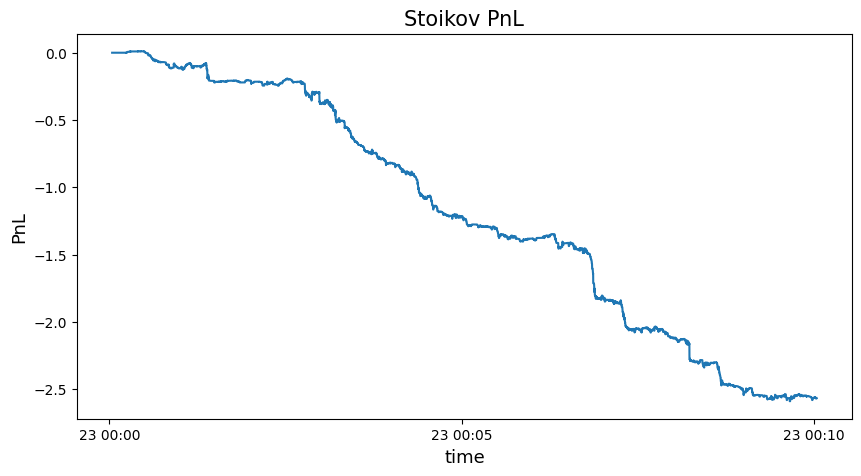

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total)
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("Stoikov PnL", fontsize=15)
plt.show()

In [13]:
logs = strategy.logs

In [14]:
own_trade_group = [
    'asset_position',
    'usd_position',
    'total_liq',
    'pnl',
    'pnl_with_liq',
]
own_trade_time = 'own_trade_time'

In [15]:
place_order_group = [
    'stock_spread',
    'ask_place',
    'bid_place',
    'indiff_price',
    'my_spread',
    'ask_diff',
    'bid_diff',
    'order_intensity',
    'volatility',
]

place_order_time = 'place_order_time'

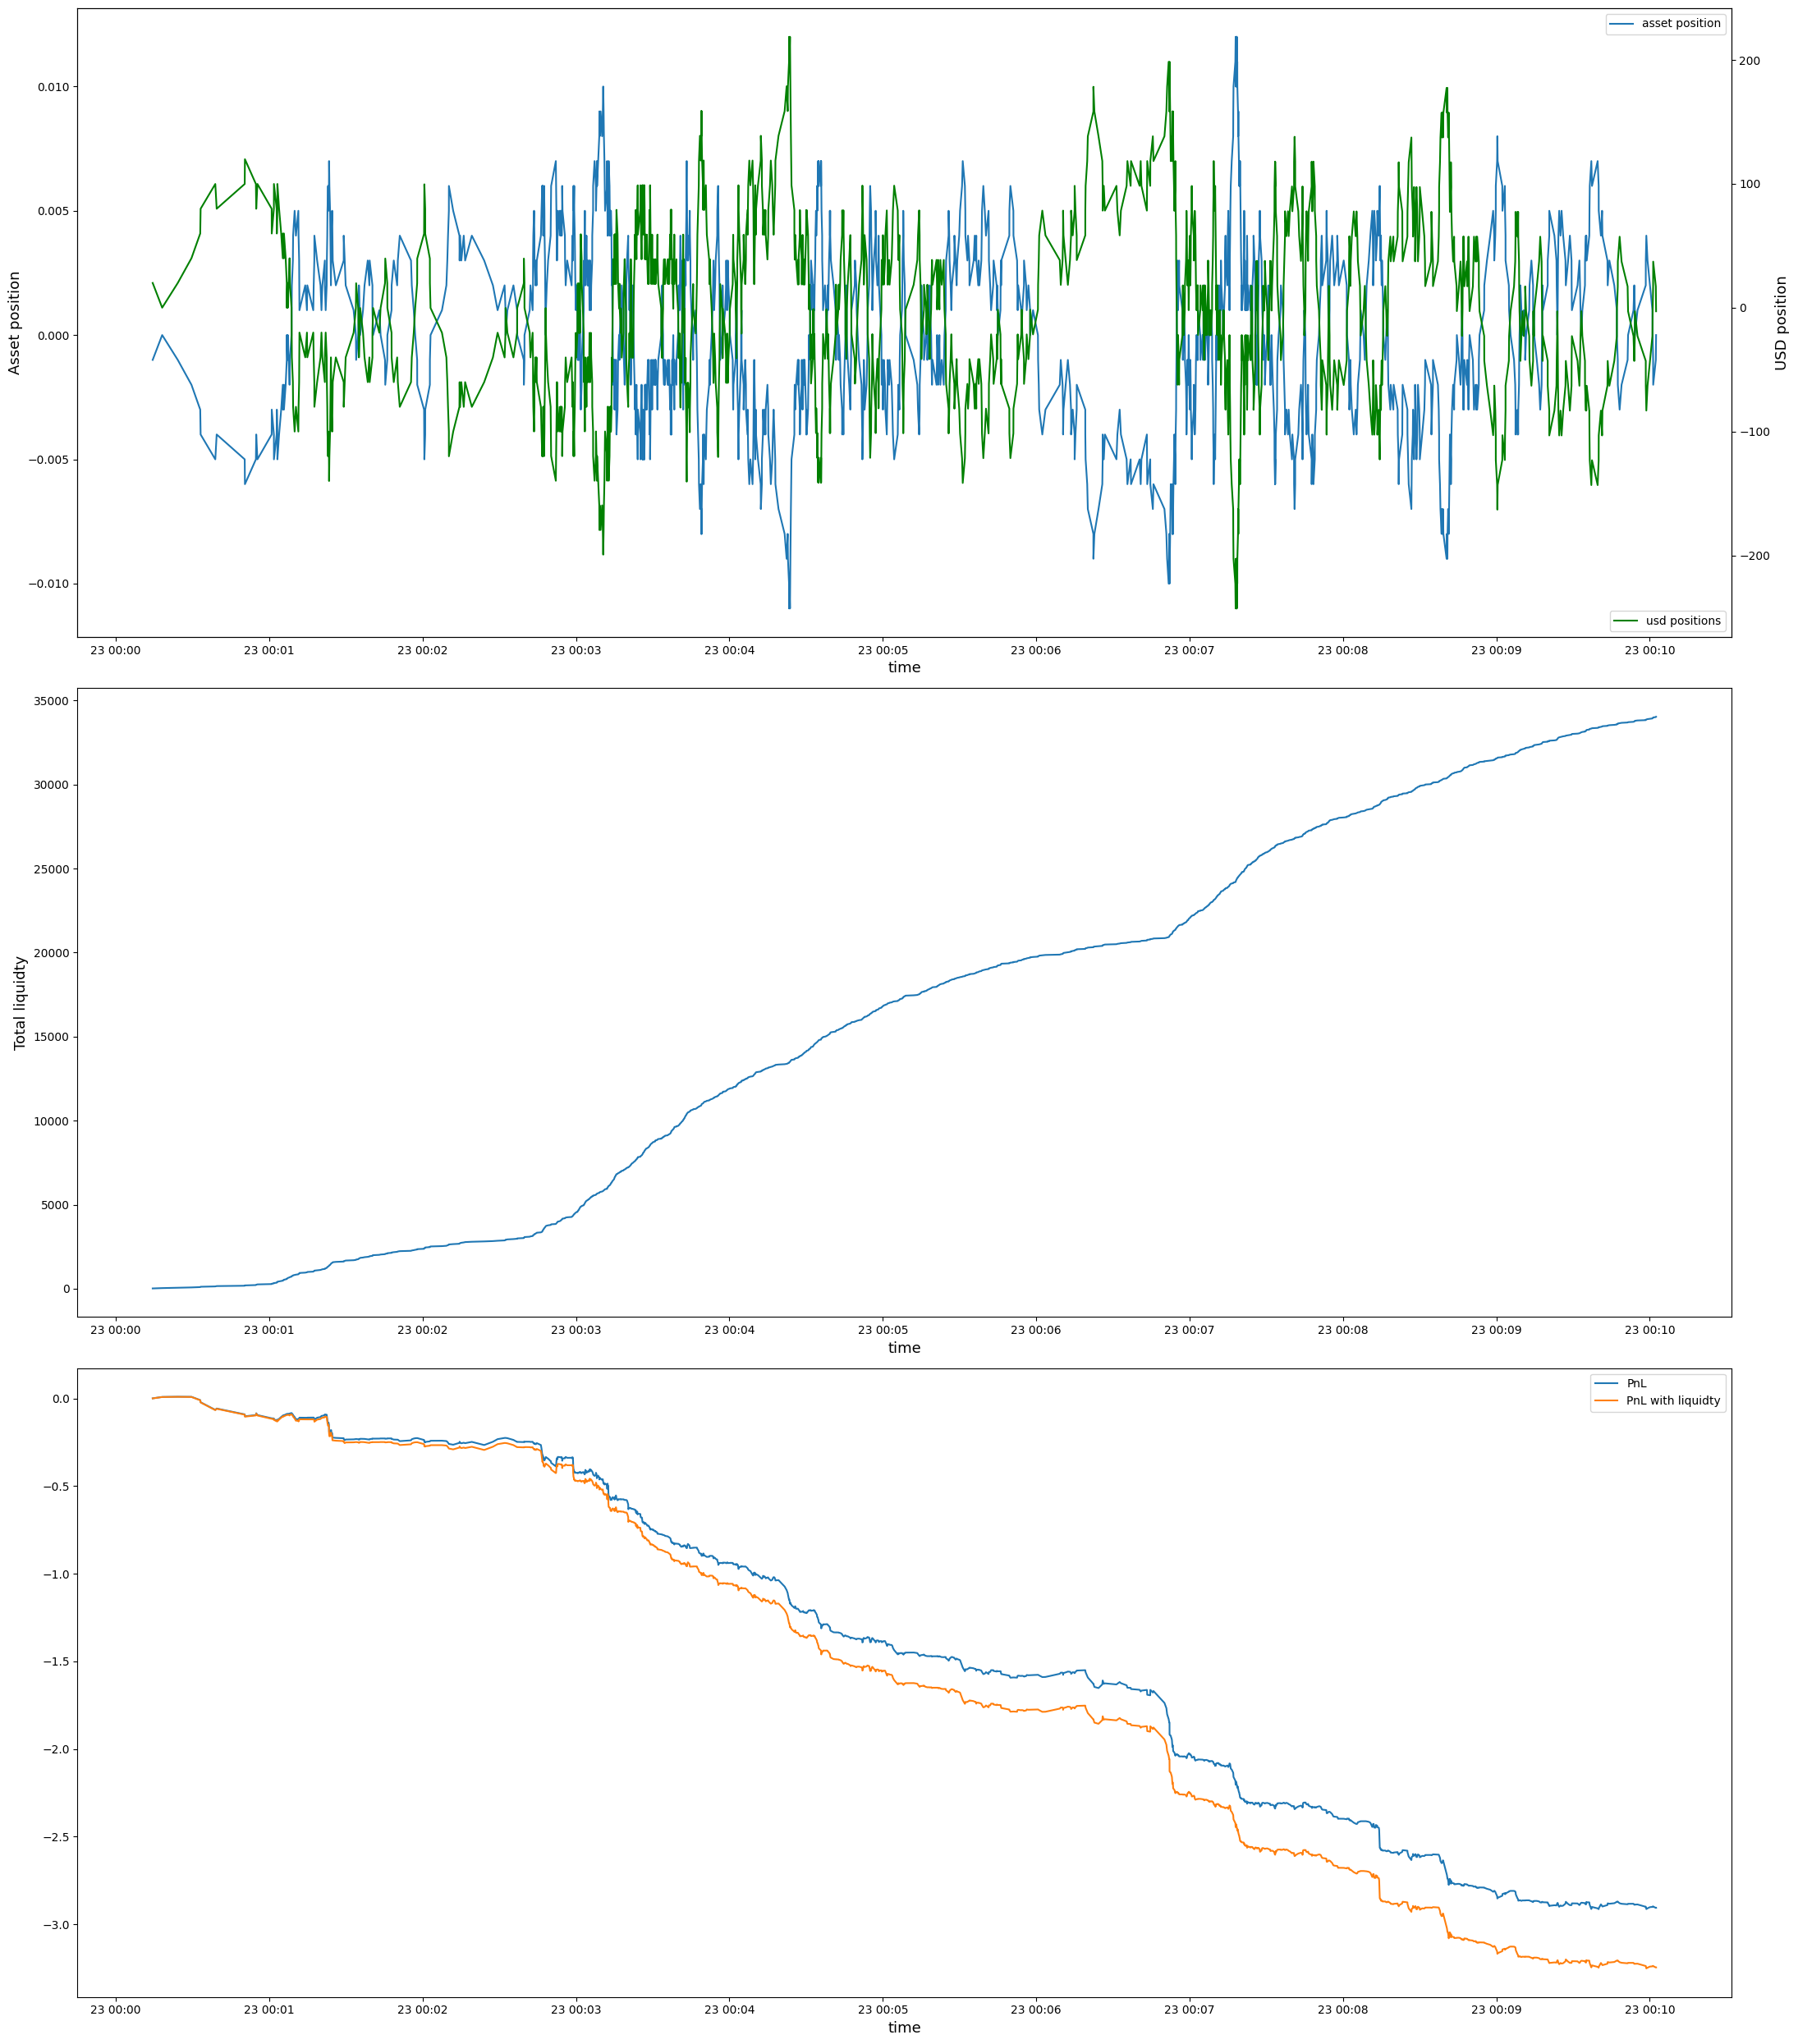

In [16]:
plt.figure(figsize=(22, 25))
dt = pd.to_datetime(logs['own_trade_time'])

ax1 = plt.subplot(3, 1, 1)
ax2 = ax1.twinx()
ax1.plot(dt, logs['asset_position'], '-', label='asset position', )
ax2.plot(dt, logs['usd_position'], '-', color='g', label='usd positions')
ax1.set_xlabel("time", fontsize=13)
ax1.set_ylabel("Asset position", fontsize=13)
ax2.set_ylabel("USD position", fontsize=13)
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
#plt.title("Inventory for gamma = %.1f, sigma = %.1f, k = %.1f"%(gamma, sigma, kappa), fontsize=15)
# plt.grid()

plt.subplot(3, 1, 2)
plt.plot(dt, logs['total_liq'])
plt.xlabel("time", fontsize=13)
plt.ylabel("Total liquidty", fontsize=13)
# plt.grid()

plt.subplot(3, 1, 3)
plt.plot(dt, logs['pnl'], '-', label='PnL')
plt.plot(dt, logs['pnl_with_liq'], '-', label='PnL with liquidty')
plt.xlabel("time", fontsize=13)
# plt.ylabel("BTC price", fontsize=13)
# plt.title("BTC price", fontsize=15)
plt.legend()
# plt.grid()

plt.tight_layout()
plt.show()

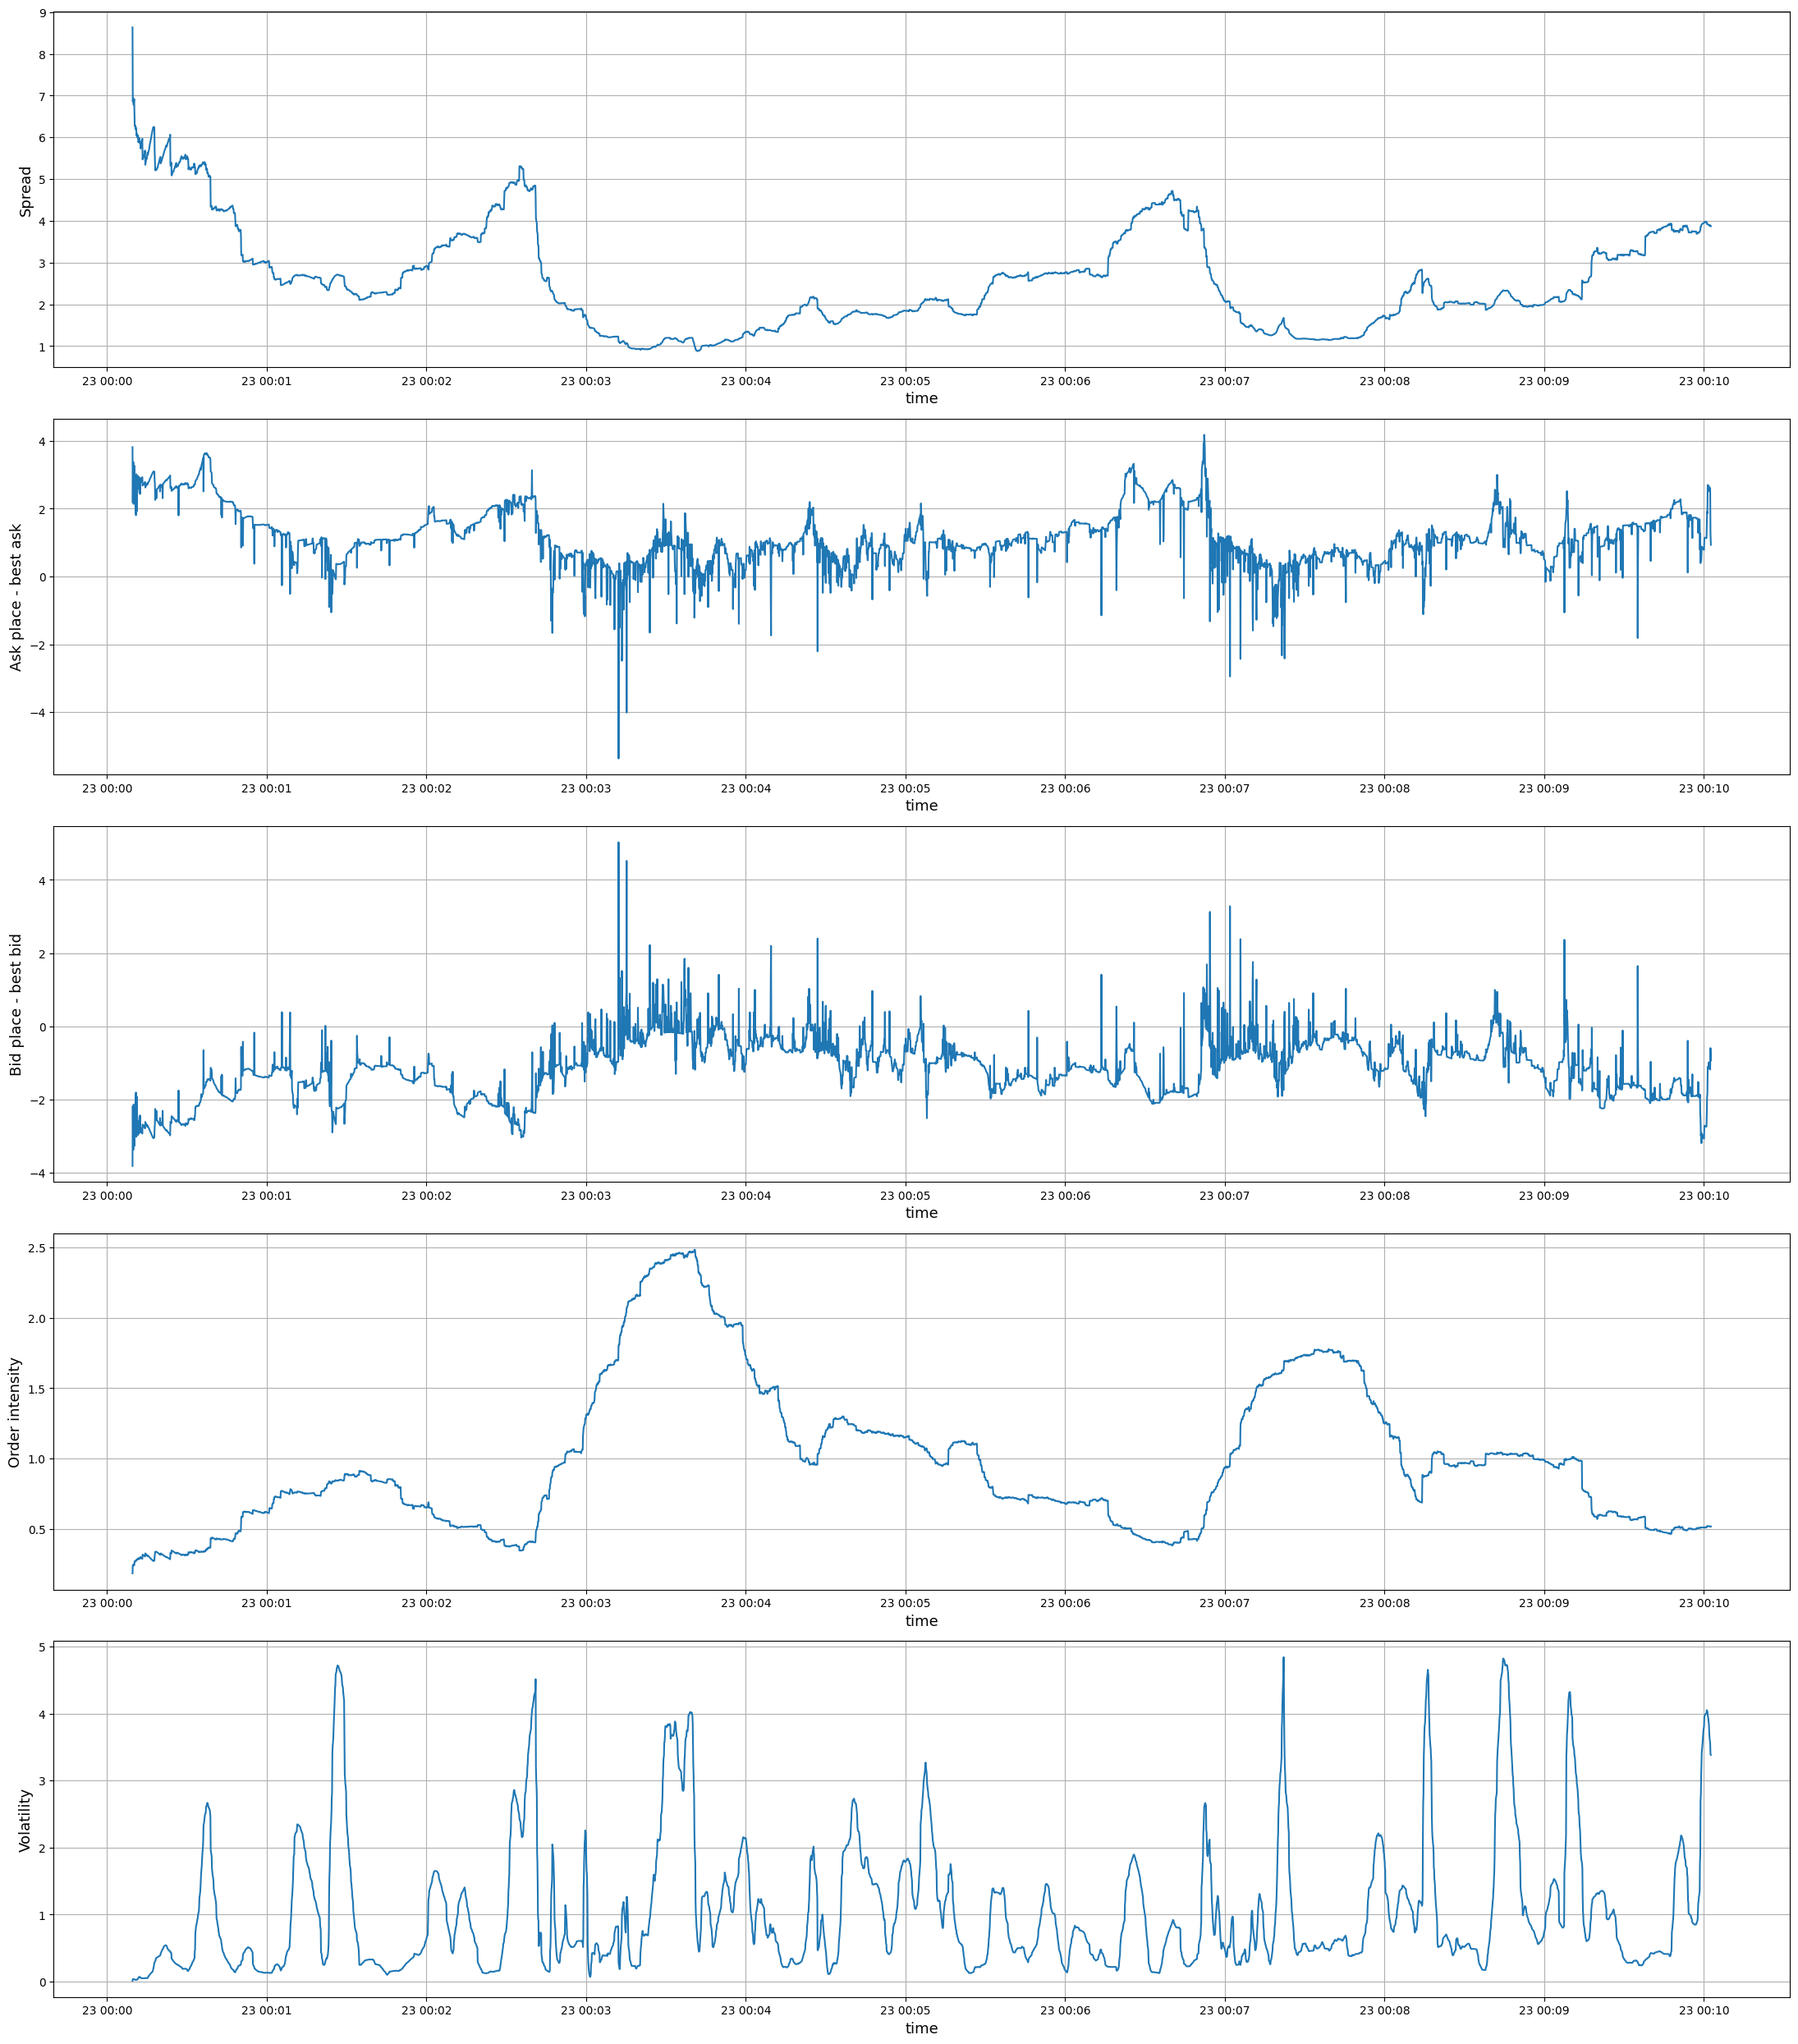

In [17]:
plt.figure(figsize=(22, 25))
dt = pd.to_datetime(logs['place_order_time'])

plt.subplot(5, 1, 1)
plt.plot(dt, logs['my_spread'])
plt.xlabel("time", fontsize=13)
plt.ylabel("Spread", fontsize=13)
plt.grid()

plt.subplot(5, 1, 2)
plt.plot(dt, logs['ask_diff'])
plt.xlabel("time", fontsize=13)
plt.ylabel("Ask place - best ask", fontsize=13)
plt.grid()

plt.subplot(5, 1, 3)
plt.plot(dt, logs['bid_diff'])
plt.xlabel("time", fontsize=13)
plt.ylabel("Bid place - best bid", fontsize=13)
plt.grid()

plt.subplot(5, 1, 4)
plt.plot(dt, logs['order_intensity'])
plt.xlabel("time", fontsize=13)
plt.ylabel("Order intensity", fontsize=13)
plt.grid()

plt.subplot(5, 1, 5)
plt.plot(dt, logs['volatility'])
plt.xlabel("time", fontsize=13)
plt.ylabel("Volatility", fontsize=13)
plt.grid()


# plt.subplot(4, 1, 4)
# plt.plot(dt, logs['pnl'], '-', label='PnL')
# plt.plot(dt, logs['pnl_with_liq'], '-', label='PnL with liquidty')
# plt.xlabel("time", fontsize=13)
# # plt.ylabel("BTC price", fontsize=13)
# # plt.title("BTC price", fontsize=15)
# plt.legend()
# plt.grid()

plt.tight_layout()
plt.show()

# Gamma

In [19]:
def run_stoikov(gamma):
    reload(simulator)
    reload(Stoikov)
    reload(get_info)
    reload(load_data)
    run_time = pd.Timedelta(10, 'm').value
    md = load_data.load_md_from_file(path=path_to_file, run_time=run_time)
    latency = pd.Timedelta(10, 'ms').value
    md_latency = pd.Timedelta(10, 'ms').value

    sim = simulator.SimOptim(md, latency, md_latency)

    #delay between orders
    delay = pd.Timedelta(0.1, 's').value

    strat = Stoikov.Strategy(
        delay=delay,
        risk_koef=gamma,
        time_oi=60*10**9,
        avg_sum_oi=800,
        avg_time_oi=57471412238,
        order_fees=0.00001,
        avg_volatility=25,
        min_asset_value=0.001,
        volatility_record_cooldown=0.1*10**9, #ns
        volatility_horizon=1000,
        order_intensity_min_samples=100
    )
    strat.run(sim)
    return strat.logs

In [20]:
gamma_list = [0.0001, 0.001, 0.01, 0.1, 1]
logs_list = []
for gamma in gamma_list:
    logs_list.append(run_stoikov(gamma))

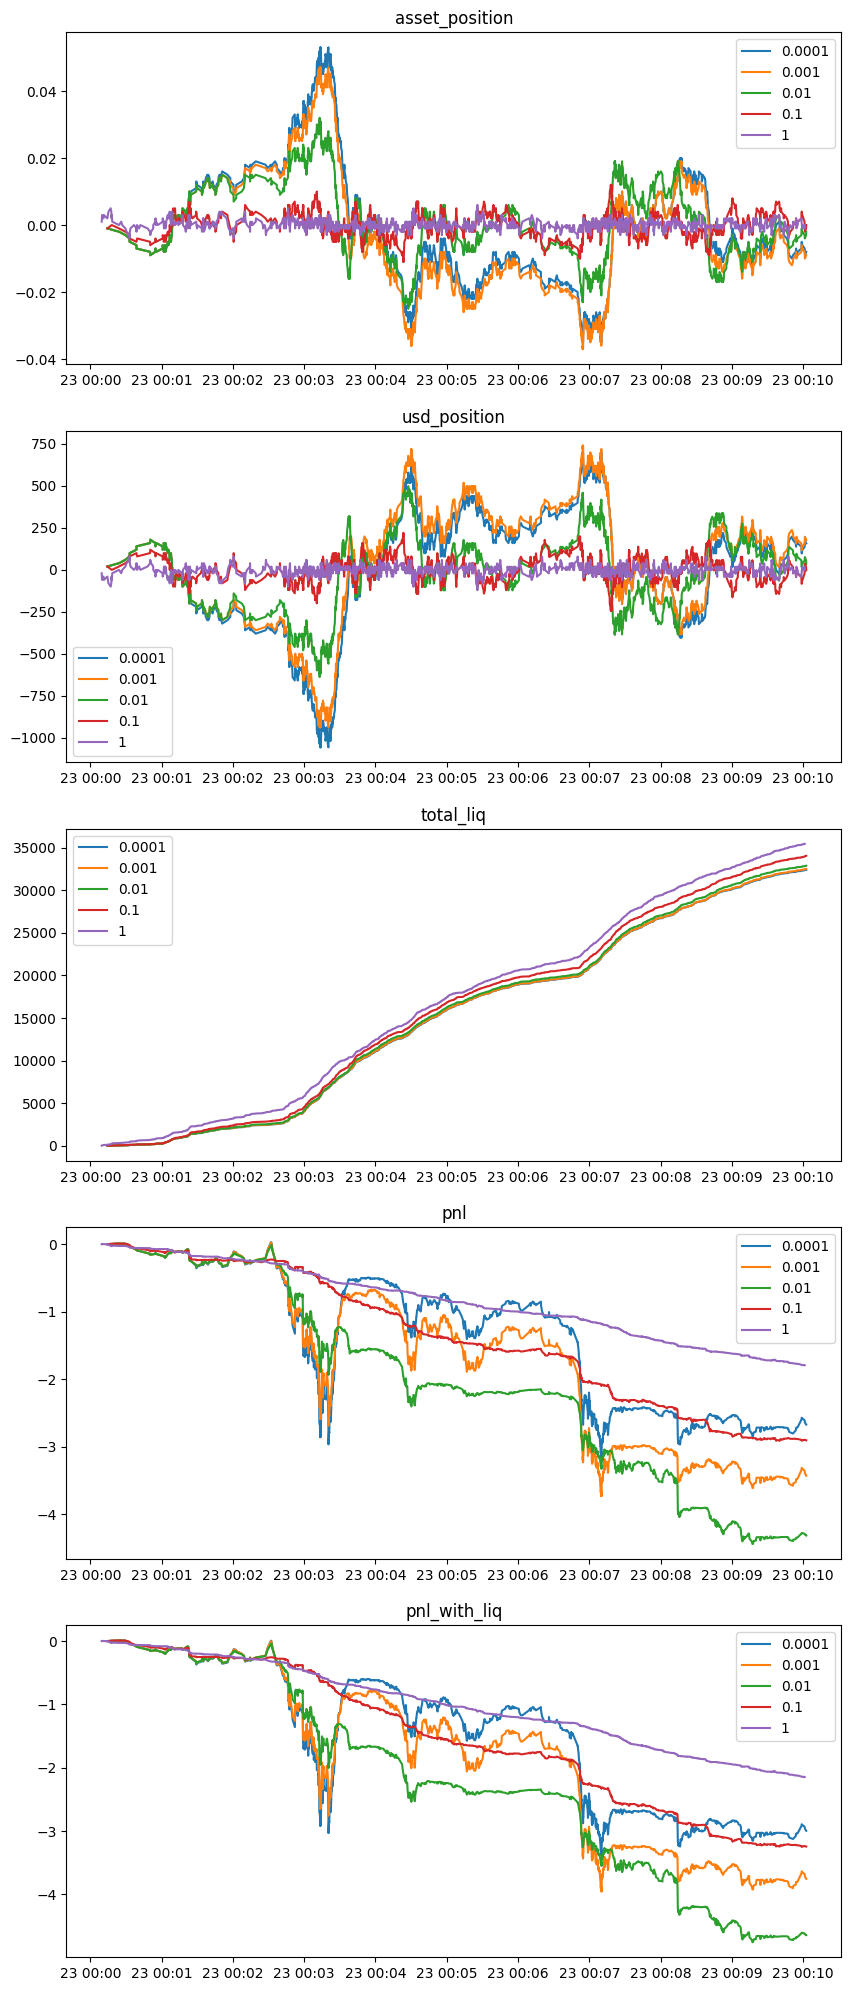

In [21]:
fig, axs = plt.subplots(len(own_trade_group), figsize=(10, 5*len(own_trade_group)))

ind = 0
for i in own_trade_group:
    for gamma, logs in zip(gamma_list, logs_list):
        axs[ind].plot(pd.to_datetime(logs[own_trade_time]), logs[i], label=gamma)
    axs[ind].set_title(i)
    axs[ind].legend()
    ind += 1

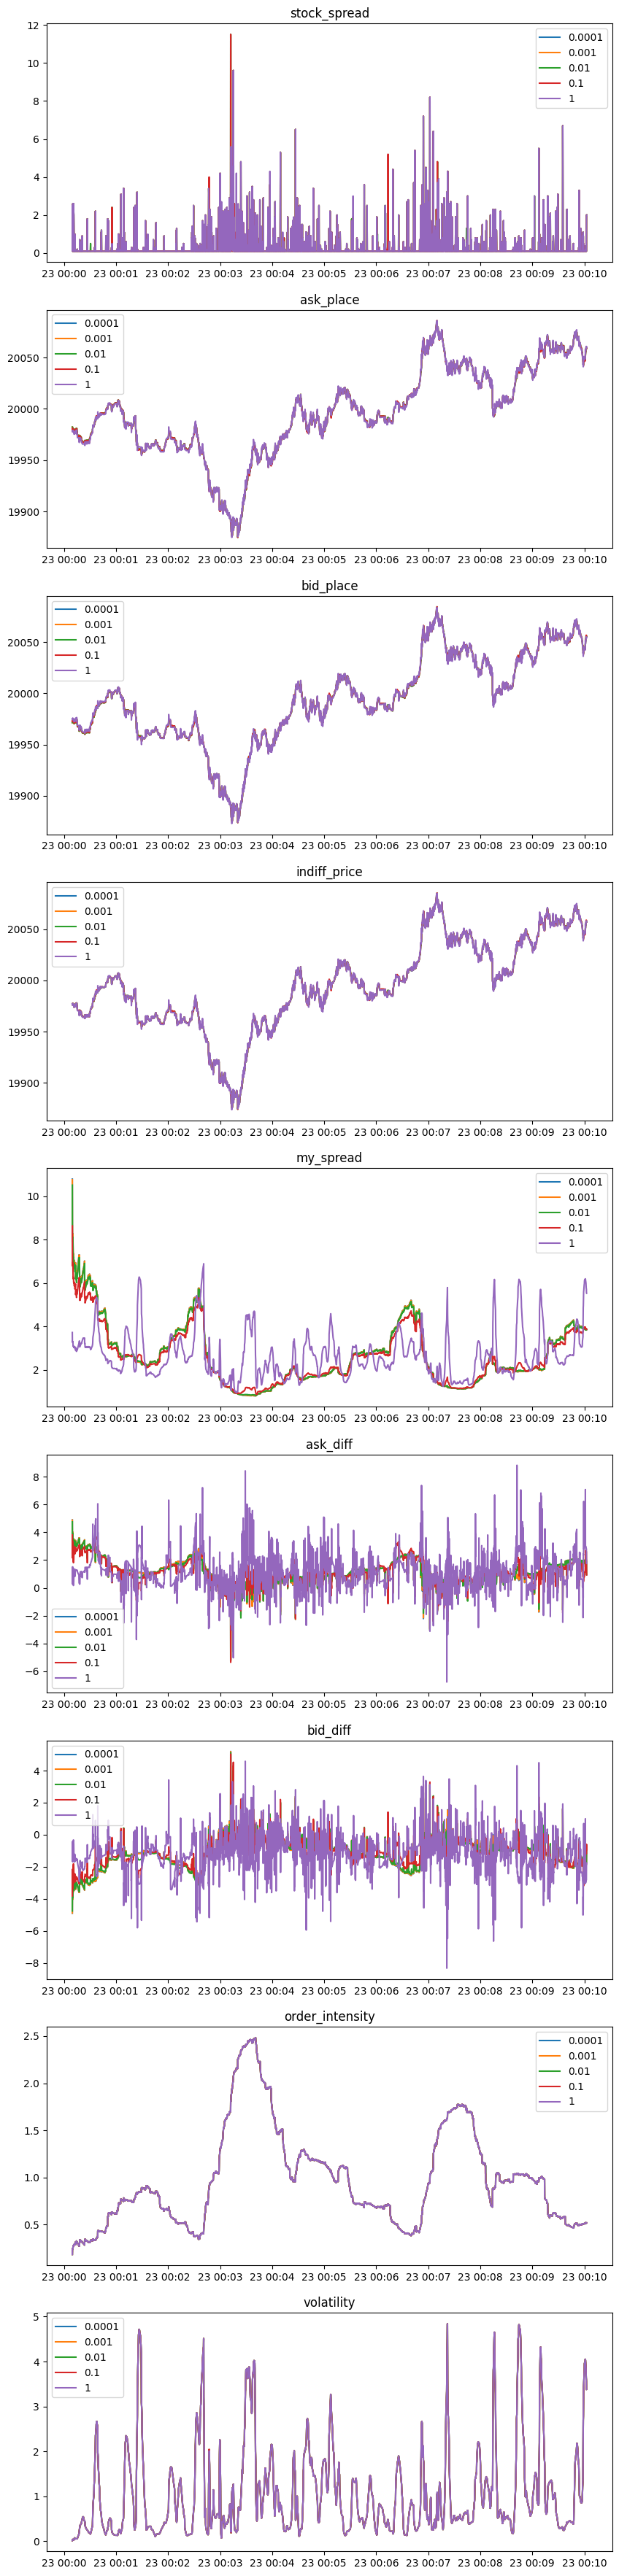

In [22]:
fig, axs = plt.subplots(len(place_order_group), figsize=(10, 5*len(place_order_group)))

ind = 0
for i in place_order_group:
    for gamma, logs in zip(gamma_list, logs_list):
        axs[ind].plot(pd.to_datetime(logs[place_order_time]), logs[i], label=gamma)
    axs[ind].set_title(i)
    axs[ind].legend()
    ind += 1